# **Import Data dan Library Penting**

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Attribute Information

1. Age: age of the patient [years]

2. Sex: sex of the patient [M: Male, F: Female]

3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4. RestingBP: resting blood pressure [mm Hg]

5. Cholesterol: serum cholesterol [mm/dl]

6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10. Oldpeak: oldpeak = ST [Numeric value measured in depression]

11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12. HeartDisease: output class [1: heart disease, 0: Normal]

# **Eksplorasi Data**

Pertama, kita ingin tahu apakah target (HeartDisease) memiliki sebaran yang balanced atau tidak.

Jumlah pasien dengan penyakit jantung adalah 508
Jumlah pasien tanpa penyakit jantung adalah 410


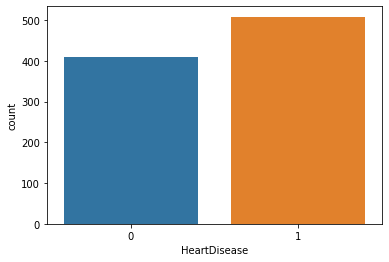

In [ ]:
print('Jumlah pasien dengan penyakit jantung adalah', (df['HeartDisease']==1).sum())
print('Jumlah pasien tanpa penyakit jantung adalah', (df['HeartDisease']==0).sum())

sns.countplot(data=df, x='HeartDisease')

Kita peroleh bahwa perbedaan di antara jumlah pasien dengan penyakit jantung dan jumlah pasien tanpa penyakit jantung tidak berbeda jauh. Maka, bisa kita katakan data target kita seimbang (balanced).

Kemudian, kita pisahkan atribut tipe data numerik dan kategori.

In [ ]:
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(exclude='object').columns.tolist()

print('Atribut dengan tipe data kategori:', cat_col)
print('Atribut dengan tipe data numerik:', num_col)

Atribut dengan tipe data kategori: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Atribut dengan tipe data numerik: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


Dari informasi atribut kita tahu bahwa FastingBS dan HeartDisease memiliki tipe data kategori. Maka, kita masukan kedua atribut ke dalam list data kategori.

In [ ]:
cat_col.append('FastingBS')
cat_col.append('HeartDisease')
num_col.remove('FastingBS')
num_col.remove('HeartDisease')

Kita akan mencoba eksplorasi data pada atribut numerik

Pertama, akan dicari distribusi dari atribut numerik.

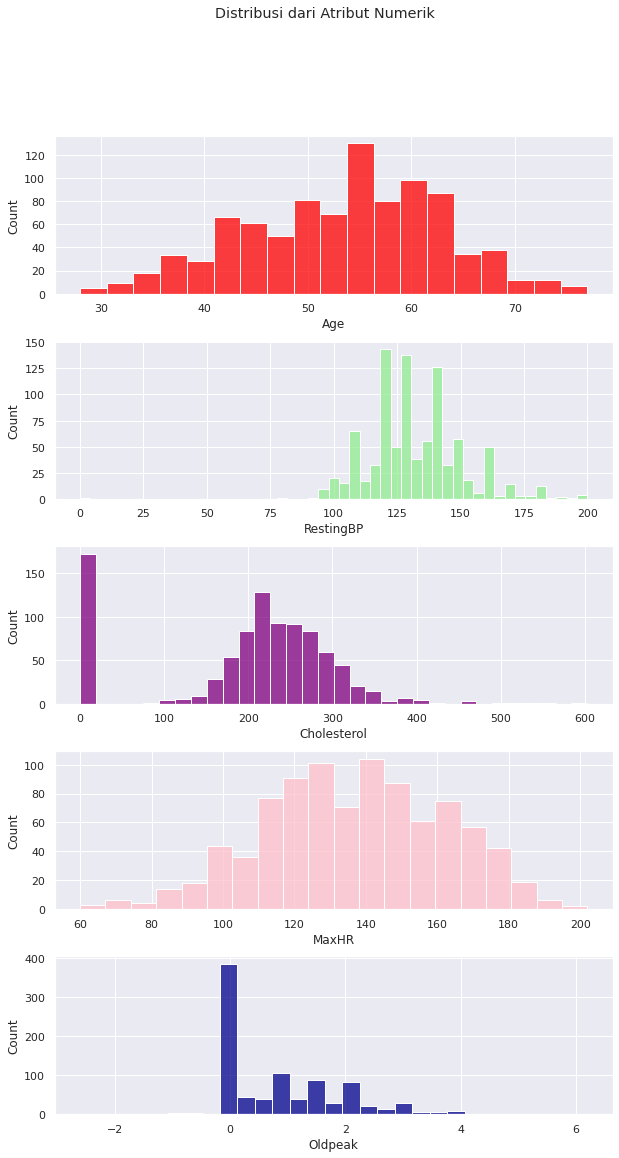

In [ ]:
indexes = [i for i in range(5)]
bunch_of_colors = ['red', 'lightgreen', 'purple', 'pink', 'darkblue']

fig, axes = plt.subplots(5, 1, figsize=(10, 18))

fig.suptitle('Distribusi dari Atribut Numerik')

for index, column, color in zip(indexes, df[num_col].columns, bunch_of_colors):
    sns.set_theme()
    sns.histplot(ax=axes[index], data=df[num_col], x=df[num_col][column], color=color)
    
fig.subplots_adjust(hspace=.3)


Kemudian, kita akan mencari korelasi atribut numerik terhadap target(HeartDisease)

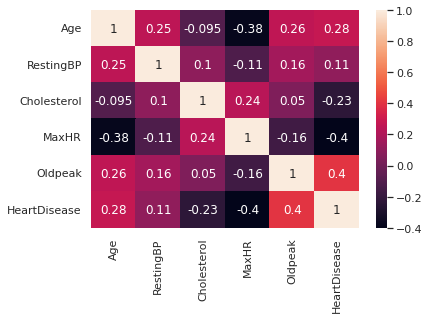

In [ ]:
numTarget = num_col.copy()
numTarget.append('HeartDisease')
sns.heatmap(df[numTarget].corr(),annot=True)

Selanjutnya, kita akan eksplorasi atribut dengan tipe data kategori.

Pertama, kita lihat persebaran masing-masing atribut berdasarkan HeartDisease

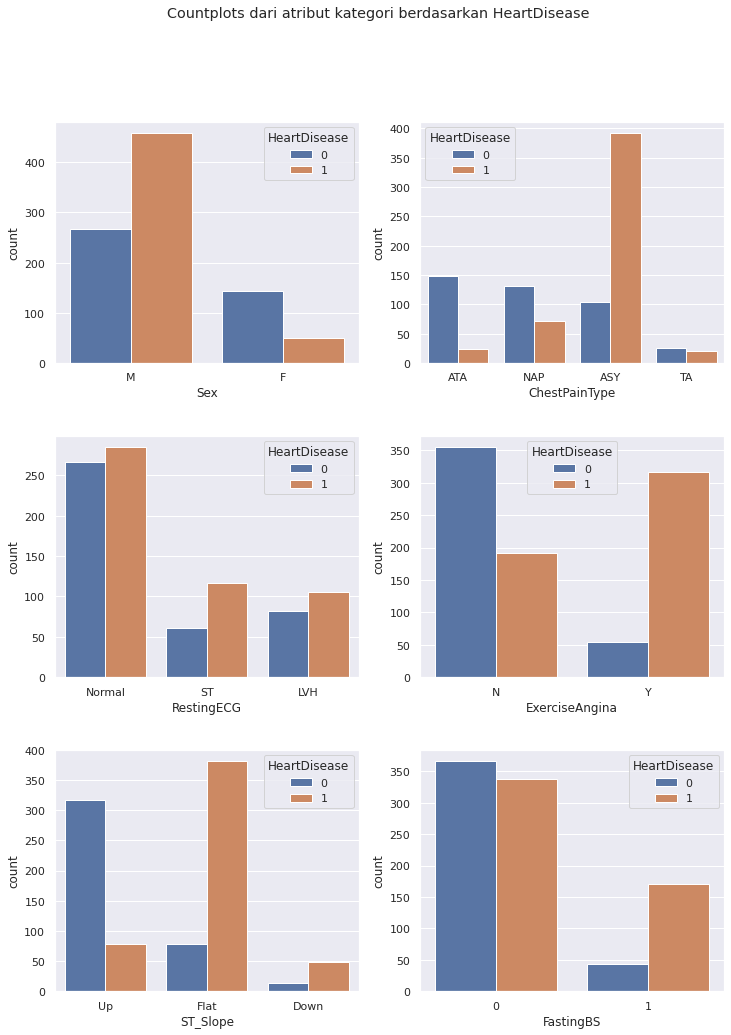

In [ ]:
CatMinTarget = cat_col.copy()
CatMinTarget.remove('HeartDisease')

indexes = [ (i,j) for i in range(3) for j in range(2)]

fig, axes = plt.subplots(3, 2, figsize=(12, 16))

fig.suptitle('Countplots dari atribut kategori berdasarkan HeartDisease')

for index, column in zip(indexes, df[CatMinTarget].columns):
    sns.countplot(ax=axes[index], data=df, x=df[CatMinTarget][column], hue='HeartDisease')
    
fig.subplots_adjust(hspace=.3)

# **Membangun Model Logistic Regression**

**Feature Engineering**

In [ ]:
# Split data menjadi X(prediktor) dan y(respon)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
# Mengubah value data kategori menjadi diskrit menggunakan One-Hot-Encoding
X = pd.get_dummies(data=X)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Menggunakan standard scaler pada data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data menjadi data training dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [ ]:
# Bangun model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Cek performa model
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('precision', score(y_test, predictions, average='weighted')[0] )
print('recall: ', score(y_test, predictions, average='weighted')[1] )
print('f1_score: ', score(y_test, predictions, average='weighted')[2] )
print('accuracy_score: ', accuracy_score(y_test, predictions) )

precision 0.8692340561905779
recall:  0.8695652173913043
f1_score:  0.8692939768647787
accuracy_score:  0.8695652173913043


# **Diskusi**

Yg perlu didiskusikan:

1. Bagaimana dengan atribut Cholesterol dan MaxHR yang memiliki korelasi negatif, padahal secara teori medis harusnya berkorelasi positif terhadap HeartDisease?
2. Kalau output berupa selang [0,1], bagaimana caranya untuk cek performa?
3. apakah model dalam kasus kita perlu skor tinggi katakanlah 99% karena kasus yg kita miliki berkenaan dengan kesehatan manusia?